In [24]:
import pandas as pd 
import numpy as np

In [25]:
df = pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [26]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [28]:
df.shape

(21, 2)

In [29]:
#df['Sorting Time'] = df['Sorting Time'].astype(float)

In [30]:
df.rename(columns = {'Delivery Time':'DeliveryTime'}, inplace = True)
df.rename(columns = {'Sorting Time':'SortingTime'}, inplace = True)

Text(0, 0.5, 'Delivery Time')

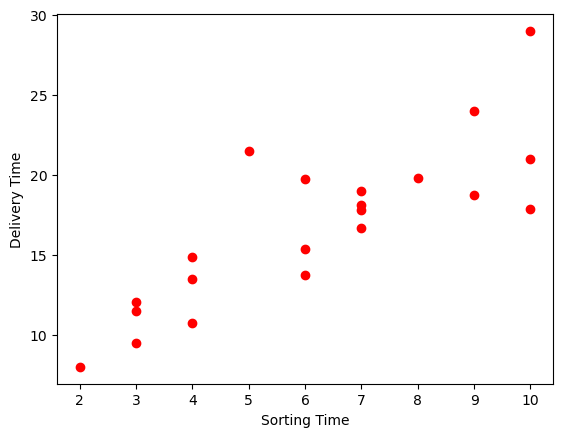

In [31]:
import matplotlib.pyplot as plt
plt.plot( df['SortingTime'] , df['DeliveryTime'] , "ro")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

In [32]:
df.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


In [33]:
#here the correlation is moderately correlated

In [34]:
df.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [35]:
import statsmodels.formula.api as smf
model = smf.ols('DeliveryTime ~ SortingTime',data=df).fit()

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        18:56:54   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#here r-square value is 68 percent so, there is a chance to improve these by doing transformations techniques

In [38]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [39]:
pred = model.predict(df.SortingTime)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [65]:
rmse_lin = np.sqrt(np.mean((np.array(df['DeliveryTime'])- np.array(pred)))**2)
rmse_lin

6.767073673905716e-16

Text(0, 0.5, 'DeliverTime')

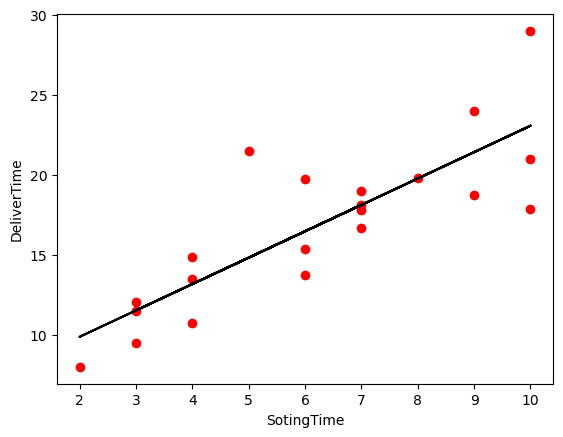

In [41]:
plt.scatter(x = df['SortingTime'], y = df['DeliveryTime'], color = 'red')
plt.plot(df['SortingTime'],pred,color = 'black')
plt.xlabel('SotingTime')
plt.ylabel('DeliverTime')

In [43]:
#log model
model2 = smf.ols('DeliveryTime ~np.log(SortingTime)',data=df).fit()

In [44]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           2.64e-06
Time:                        19:13:13   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#here rsquare and adjrsquare value is slightly increased

In [46]:
pred2 = model2.predict(pd.DataFrame(df['SortingTime'])) 
pred2  

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [47]:
rmse_log = np.sqrt(np.mean((np.array(df['DeliveryTime'])-np.array(pred2))**2))
rmse_log   

2.733171476682066

In [48]:
#clearly we see that the rmse value is slightly decrease

Text(0, 0.5, 'DeliveryTime')

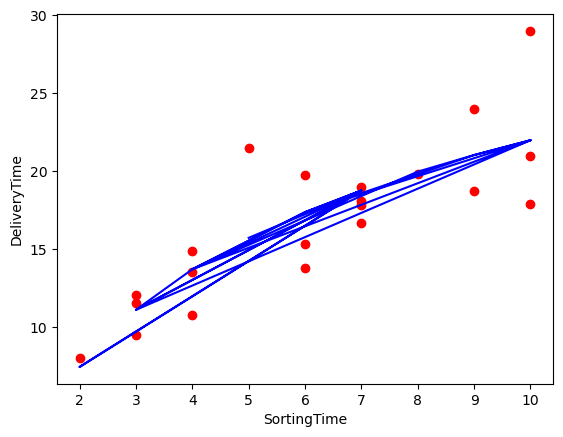

In [50]:
plt.scatter(x=df['SortingTime'],y=df['DeliveryTime'],color='red')
plt.plot(df['SortingTime'],pred2,color='blue')
plt.xlabel('SortingTime')
plt.ylabel('DeliveryTime') 

In [51]:
#exponential model
model3 = smf.ols('np.log(DeliveryTime)~ SortingTime',data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Mon, 20 Feb 2023   Prob (F-statistic):           1.59e-06
Time:                          19:23:07   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
pred3= model3.predict(pd.DataFrame(df['SortingTime']))
pred3

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [69]:
rmse_exp = np.sqrt(np.mean((np.array(df['DeliveryTime'])-np.array(pred3))**2)) 
rmse_exp

14.795516941016686

Text(0, 0.5, 'DeliveryTime')

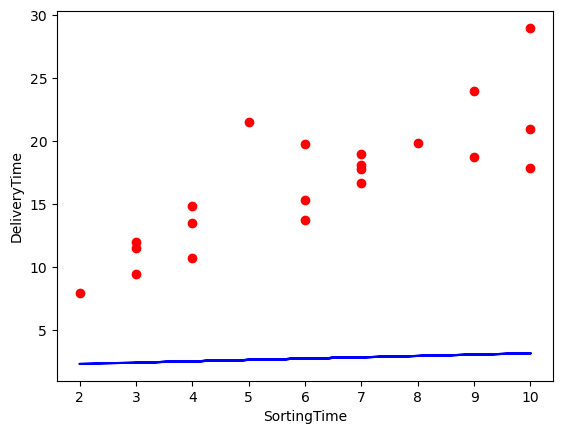

In [55]:
plt.scatter(x=df['SortingTime'],y=df['DeliveryTime'],color='red')
plt.plot(df.SortingTime,pred3,color='blue')
plt.xlabel('SortingTime')
plt.ylabel('DeliveryTime')
 

In [ ]:
#in these model r-square value is slightly increaased but the value for rmse value is increased

In [56]:
df["SortingTime_sq"] = df.SortingTime*df.SortingTime
df

,DeliveryTime,SortingTime,SortingTime_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [57]:
# exponential + square transformation

model4 = smf.ols("np.log(DeliveryTime) ~ SortingTime + SortingTime_sq", data = df).fit()
type(model4)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [58]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.765
Model:                              OLS   Adj. R-squared:                  0.739
Method:                   Least Squares   F-statistic:                     29.28
Date:                  Mon, 20 Feb 2023   Prob (F-statistic):           2.20e-06
Time:                          19:34:50   Log-Likelihood:                 9.9597
No. Observations:                    21   AIC:                            -13.92
Df Residuals:                        18   BIC:                            -10.79
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6997      0.228      7.441      0.000       1.220       2.180
SortingTime        0.2659      0.080      3.315      0.004       0.097       0.434
SortingTime_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
pred4 = model4.predict(df)
pred4 = np.exp(pred4)
#as we use log(SortingTime) in preparing our model so, we have to convert it back
pred4

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [70]:
rmse_quad = np.sqrt(np.mean((np.array(df['DeliveryTime']) - np.array(pred4))**2))
rmse_quad

2.799041988740925

In [61]:
#clearly we observe that the rmse value is decreased and also the r-square value is increased

Text(0, 0.5, 'deliveryTime')

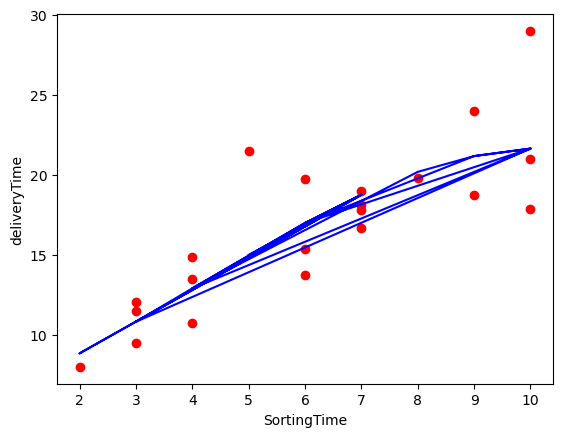

In [62]:
plt.scatter(x = df['SortingTime'],  y = df['DeliveryTime'] ,color = 'red')
plt.plot(df['SortingTime'], pred4,color = 'blue')
plt.xlabel('SortingTime')
plt.ylabel('deliveryTime')

In [71]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared])}
table=pd.DataFrame(data)
table 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,6.767074e-16,0.682271
1,rmse_log,1.479552e+01,0.695443
2,rmse_exp,1.479552e+01,0.710948
3,rmse_quad,2.799042e+00,0.764867


In [65]:
#by observing all the things , the model4 is the best model which have high r-square value and low rmse values

In [72]:
# prediction for new data
new_data = pd.Series([ 11,12,15])

In [73]:
data_pred = pd.DataFrame( new_data, columns= ['SortingTime'])
data_pred

,SortingTime
0,11
1,12
2,15


In [80]:
model.predict (data_pred)

0    24.721953
1    26.370973
2    31.318032
dtype: float64

In [73]:
#we clearly observe that the increasing of sorting time leads to increase of delivery time